# CPS 844 Assignment 1
#### Cameron Shih, 501028169 Winter 2024

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


### Load dataset

In [3]:
data = pd.read_csv(r"C:\Users\noctu\Desktop\CPS_844\Assignment_1\letter-recognition.data",
                    sep=',',
                    names=["letter", "x-pos", "y-pos", "width", "height", "onpix",
                     "x-bar", "y-bar", "x2bar", "y2bar" ,"xybar" ,"x2ybr" ,"xy2br" ,
                     "x-ege" ,"xegvy" ,"y-ege" ,"yegvx"])
"""letter_to_number = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 
                    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 
                    'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}"""

"letter_to_number = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, \n                    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, \n                    'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}"

### Split features and target value
<li>split training and testing data in a 80/20 split</li>

In [4]:
data = data.values
x = data[:,1:17]
y = data[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Decision Tree Classifier

Accuracy Score: 0.87375


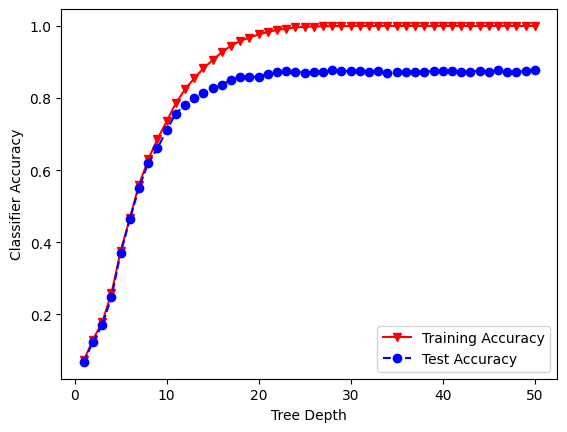

In [3]:
test_accs = []
train_accs = []
depth = list(range(1,51))
for i in range(1,51):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_accs.append(accuracy_score(y_train, y_pred_train))
    test_accs.append(accuracy_score(y_test, y_pred_test))

plt.plot(depth, train_accs,'rv-',depth,test_accs,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')

clfD = tree.DecisionTreeClassifier()
clfD.fit(x_train,y_train)
clfD_pred = clfD.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, clfD_pred))

# K-Nearest Neighbour Classifier

In [4]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm="auto", weights="distance")
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, knn_pred))

Accuracy Score:  0.956


# Neural Network Classifier

In [5]:
nnc = MLPClassifier(hidden_layer_sizes=100, max_iter=250, activation="logistic")
nnc.fit(x_train, y_train)
nnc_pred = nnc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, nnc_pred))

Accuracy Score:  0.9305


c:\Users\noctu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


# SVM Classifier

In [6]:
svm = SVC(C = 10, kernel='rbf')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, svm_pred))

Accuracy Score:  0.958


# Naives Bayes (Gaussian) Classifier

In [7]:
nbg = GaussianNB()
nbg.fit(x_train, y_train)
nbg_pred = nbg.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, nbg_pred))

Accuracy Score:  0.6385
